### Nicholas Zhang
### JHED: nzhang36
### Git: nickyz4

# Question 1
### Download and read data

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lin
import sklearn.model_selection as mod
import statsmodels.formula.api as smf
import statsmodels as sm

## this sets some style parameters
sns.set()

## Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

## Read in the data and display a few rows
df = pd.read_csv("kirby21.csv")
df.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


### For the 21 subjects, use both the left and right telencephalon to predict CSF volume (using the level 1, type 1 volumes). Interpret the coefficients.

In [0]:
# Extract columns of interest: roi, volume, type, level
df = df.loc[:, ('roi', 'volume', 'type', 'level')]

# Extract the Type 1 Level 1 data
df = df.loc[(df.type == 1) & (df.level == 1)] # looking for where type = 1 and level = 1

# extract only left and right telencephalon volumes
x1 = df[df.roi.str.contains('Telencephalon_L')]
x1 = x1['volume'].values # left telencephalon volumes

x2 = df[df.roi.str.contains('Telencephalon_R')]
x2 = x2['volume'].values # right telencephalon volumes


# extract CSF volumes
yTrain = df[df.roi.str.contains('CSF')]
yTrain = yTrain['volume'].values # CSF volumes

(20, 2)
(20,)
R squared:  0.2570347265764862
For every 1 unit change in the Left Volume predictor, with all other   regressors held constant, the estimated change  in CSF volume is  1.949753208996091
For every 1 unit change in the Right Volume predictor, with all other   regressors held constant, the estimated change  in CSF volume is  -1.700304994360876


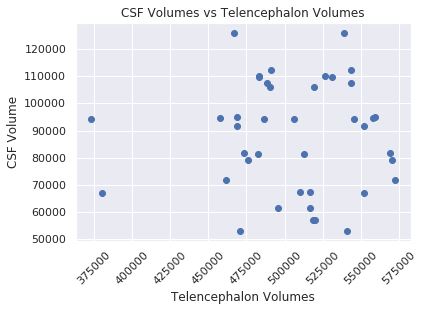

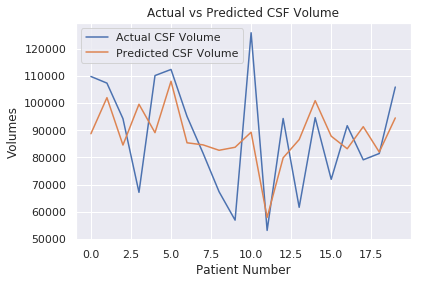

In [102]:
# Regress and interpret the coefficients
xTrain = np.column_stack((x1, x2)).reshape(-1, 2)
print(xTrain.shape)
print(yTrain.shape)
model = lin.LinearRegression().fit(xTrain, yTrain)
csfVolPred = model.predict(xTrain) # predict

# get model parameters
betas = model.coef_ # regressors
intercept = model.intercept_ # intercept
print('R squared: ', model.score(xTrain, yTrain)) # R squared


# see what the data looks like
plt.figure()
plt.scatter(xTrain, [yTrain, yTrain])
plt.title('CSF Volumes vs Telencephalon Volumes')
plt.ylabel('CSF Volume')
plt.xlabel('Telencephalon Volumes')
plt.xticks(rotation = 45)

# plot regression
plt.figure()
plt.plot(yTrain, label = 'Actual CSF Volume')
plt.plot(csfVolPred, label = 'Predicted CSF Volume')
plt.legend()
plt.title('Actual vs Predicted CSF Volume')
plt.ylabel('Volumes')
plt.xlabel('Patient Number')

# Interpret the coefficients
print('For every 1 unit change in the Left Volume predictor, with all other ', \
      ' regressors held constant, the estimated change ', \
     'in CSF volume is ', betas[0])
print('For every 1 unit change in the Right Volume predictor, with all other ', \
      ' regressors held constant, the estimated change ', \
     'in CSF volume is ', betas[1])

# Question 2


### Part a: Create a logistic regression model to predict graduate school admission using gpa, gre score and undergraduate department prestige (rank). Hold out 25% of the data (randomly selected) for testing and 75% for training.

In [103]:
## Download in the data if it's not already there
! if [ ! -e binary.csv ]; \
then wget https://raw.githubusercontent.com/nickyz4/BME_data_science/master/binary.csv; \
fi;

## Read in the data and display a few rows
df = pd.read_csv("binary.csv")
df.head(20)

# extract columns of interest
x = df[['gre', 'gpa', 'rank']]
y = df['admit']


# separate data for testing and training
# from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = mod.train_test_split(x, y, test_size = 0.25, random_state = 10)

# Fit with logistic regression
lr = lin.LogisticRegression(fit_intercept = True, \
                            solver = 'lbfgs', \
                            multi_class = 'multinomial')
fit = lr.fit(xTrain, yTrain)
print(lr.get_params)
print('R squared: ', fit.score(xTrain, yTrain))

# fit = sm.discrete.discrete_model.MNLogit(yTrain, xTrain).fit() # fit the data
# fit.summary()

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>
R squared:  0.6966666666666667


### Part b: Interpret your logistic regression coefficients.


In [104]:
betas = fit.coef_ # regressors
intercept = fit.intercept_ # intercept

# Interpret the coefficients
print('For every 1 unit change in GRE score, with all other ', \
      'regressors equal to 0, the estimated change ', \
     'in probability of grad school admission is ', betas[0, 0])
print('For every 1 unit change in GPA, with all other ', \
      'regressors equal to 0, the estimated change ', \
     'in probability of grad school admission is ', betas[0, 1])
print('For every 1 unit change in rank, with all other ', \
      'regressors equal to 0, the estimated change ', \
     'in probability of grad school admission is ', betas[0, 2])

For every 1 unit change in GRE score, with all other  regressors equal to 0, the estimated change  in probability of grad school admission is  0.0010161283195023203
For every 1 unit change in GPA, with all other  regressors equal to 0, the estimated change  in probability of grad school admission is  0.3255170861124767
For every 1 unit change in rank, with all other  regressors equal to 0, the estimated change  in probability of grad school admission is  -0.27591231655142967


### Part c: Predict the probability of admission for your testing data. Create a series of probability thresholds from 0 to 1. For each threshold, threshold your predicted probabilities and compare the sensitivity, specificity and accuracy of your predictions. Create a plot of each, plotting 
### Threshold (x) by sensitivity (y)
### Threshold (x) by specificity (y)
### Threshold (x) by accuracy (y)



Threshold probability:  0.0
Sensitivity:  1.0
Specificity:  0.0
Accuracy:  0.3

Threshold probability:  0.1
Sensitivity:  1.0
Specificity:  0.014285714285714285
Accuracy:  0.31

Threshold probability:  0.2
Sensitivity:  0.9
Specificity:  0.2857142857142857
Accuracy:  0.47

Threshold probability:  0.30000000000000004
Sensitivity:  0.7333333333333333
Specificity:  0.5857142857142857
Accuracy:  0.63

Threshold probability:  0.4
Sensitivity:  0.4666666666666667
Specificity:  0.8142857142857143
Accuracy:  0.71

Threshold probability:  0.5
Sensitivity:  0.23333333333333334
Specificity:  0.9428571428571428
Accuracy:  0.73

Threshold probability:  0.6000000000000001
Sensitivity:  0.03333333333333333
Specificity:  0.9714285714285714
Accuracy:  0.69

Threshold probability:  0.7000000000000001
Sensitivity:  0.0
Specificity:  1.0
Accuracy:  0.7

Threshold probability:  0.8
Sensitivity:  0.0
Specificity:  1.0
Accuracy:  0.7

Threshold probability:  0.9
Sensitivity:  0.0
Specificity:  1.0
Accuracy: 

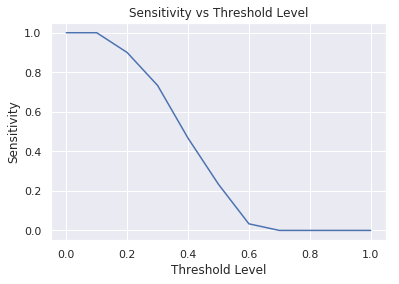

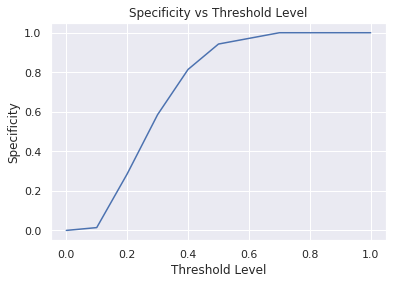

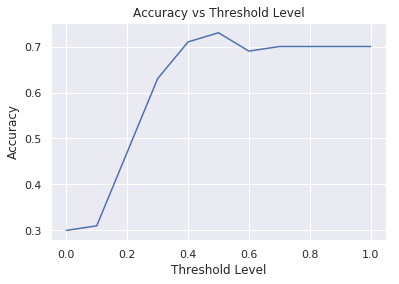

In [105]:
# calculate and plot sensitivity
def sensitivity(predict, actual):
    
    truePos = [1 if predict[i] == 1 and actual[i] == 1 else 0 for i in range(len(predict))]
    truePos = np.sum(truePos) # guessed 1, actual 1
    
    allPos = np.count_nonzero(actual)
    
    return truePos / allPos

# calculate and plot specificity
def specificity(predict, actual):
    
    trueNeg = [1 if predict[i] == 0 and actual[i] == 0 else 0 for i in range(len(predict))]
    trueNeg = np.sum(trueNeg) # guessed 0, actual 0
    
    allNeg = np.count_nonzero(actual == 0) # all negatives
    
    return trueNeg / allNeg

# calculate and plot accuracy
def accuracy(predict, actual):
    
    acc = np.equal(predict, actual)
    acc = np.sum(acc) # guess matched actual
    
    return acc / len(predict)

# plot sensitivity, specificity, or accuracy
def plotMetric(thresh, quant, title, xTitle, yTitle):
    
    plt.figure()
    plt.plot(thresh, quant)
    plt.title(title)
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    
    return

#################################################################################




admissionProb = fit.predict_proba(xTest)[:, 1] # prob of admission (1)

thresh = np.linspace(0, 1, 11) # probability thresholds
sens = np.array([])
spec = np.array([])
acc = np.array([])

for i, t in enumerate(thresh):
        
    aboveThresh = np.array([1 if admissionProb[i] > t else 0 for i in range(len(admissionProb))])
      
    sens = np.append(sens, sensitivity(aboveThresh, yTest.values))
    spec = np.append(spec, specificity(aboveThresh, yTest.values))
    acc = np.append(acc, accuracy(aboveThresh, yTest.values))
    
    print('Threshold probability: ', t)
    print('Sensitivity: ', sens[i])
    print('Specificity: ', spec[i])
    print('Accuracy: ', acc[i])
    print()
    
# plot 
plotMetric(thresh, sens, title = 'Sensitivity vs Threshold Level', \
           xTitle = 'Threshold Level', \
           yTitle = 'Sensitivity')
plotMetric(thresh, spec, title = 'Specificity vs Threshold Level', \
           xTitle = 'Threshold Level', \
           yTitle = 'Specificity')
plotMetric(thresh, acc, title = 'Accuracy vs Threshold Level', \
           xTitle = 'Threshold Level', \
           yTitle = 'Accuracy')

# Question 3
### For your project, load in your data and start doing some basic exploratory data analysis in the form of plots and summaries.


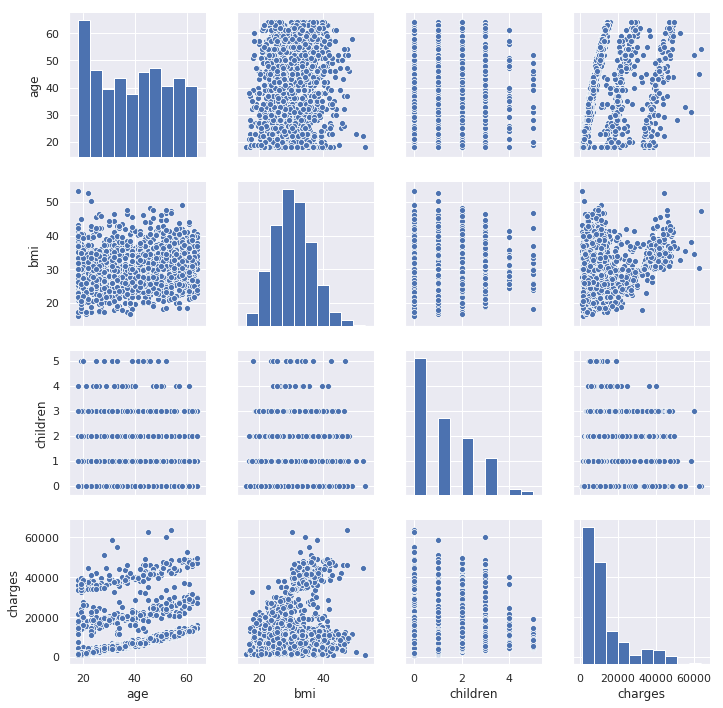

In [106]:
## Download in the data if it's not already there
! if [ ! -e insurance.csv ]; \
then wget https://raw.githubusercontent.com/nickyz4/BME_data_science/master/insurance.csv; \
fi;

## Read in the data and display a few rows
df = pd.read_csv("insurance.csv")
df.head()

# pair everything without categorical data
sns.pairplot(df, vars = ['age', 'bmi', 'children', 'charges'])

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
R squared:  0.09500578014781047
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
R squared:  0.04826497366267257
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
R squared:  0.003760359520389889


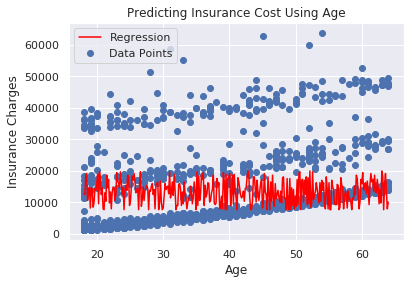

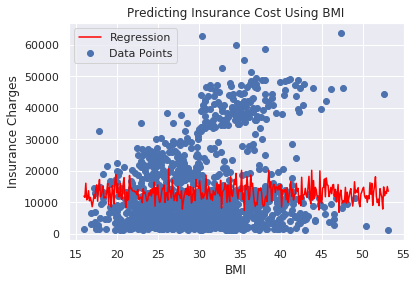

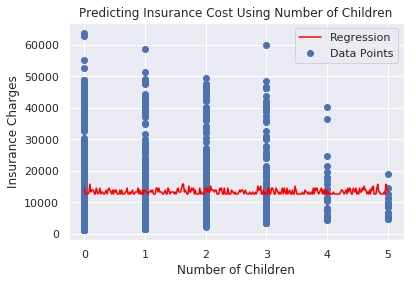

In [107]:
# perform linear regression
def regress(x, y, regressType, labelx, labely, title):
    
    # separate data for testing and training
    # from sklearn.model_selection import train_test_split
    xTrain, xTest, yTrain, yTest = mod.train_test_split(x, y, test_size = 0.25, random_state = 10)

    # train model, either linear and logistic
    if regressType == 'linear':
        
        lr = lin.LinearRegression(fit_intercept = True)
        
    elif regressType == 'logistic':
        
        lr = lin.LogisticRegression(fit_intercept = True, \
                            solver = 'lbfgs', \
                            multi_class = 'multinomial')
        
    else:
        
        print('Invalid Regression Type')
    
    fit = lr.fit(xTrain, yTrain)
    print(lr.get_params)
    print('R squared: ', fit.score(xTrain, yTrain))

    # predict
    yHat = fit.predict(xTest)

    plt.figure()
    plt.scatter(x, y, label = 'Data Points')
    plt.plot(np.linspace(min(x), max(x), len(yHat)), yHat, \
             color = 'red', \
            label = 'Regression')
    plt.legend()
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)

    return


# age vs charge: linear regression
x = df['age'].values.reshape(-1, 1)
y = df['charges'].values.reshape(-1, 1)

regress(x, y, regressType = 'linear', \
        labelx = 'Age', \
        labely = 'Insurance Charges', \
       title = 'Predicting Insurance Cost Using Age')

# sex vs charge: logistic regression
# x = df['sex']
# y = df['charges']

# regress(x, y, regressType = 'logistic', \
#         labelx = 'Sex', \
#         labely = 'Insurance Charges', \
#        title = 'Predicting Insurance Cost Using Age')

# bmi vs charge: linear regression
x = df['bmi'].values.reshape(-1, 1)
y = df['charges'].values.reshape(-1, 1)

regress(x, y, regressType = 'linear', \
        labelx = 'BMI', \
        labely = 'Insurance Charges', \
       title = 'Predicting Insurance Cost Using BMI')

# children vs charge: linear regression
x = df['children'].values.reshape(-1, 1)
y = df['charges'].values.reshape(-1, 1)

regress(x, y, regressType = 'linear', \
        labelx = 'Number of Children', \
        labely = 'Insurance Charges', \
       title = 'Predicting Insurance Cost Using Number of Children')

# smoker vs charge: logistic (binomial) regression

# region vs charge: logistic regression